In [23]:
from lib import transient
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

43
[(<matplotlib.lines.Line2D object at 0x000001CA3A3BF320>, 5.6), (<matplotlib.lines.Line2D object at 0x000001CA40782CC0>, 6.0), (<matplotlib.lines.Line2D object at 0x000001CA40D8C6A0>, 6.5), (<matplotlib.lines.Line2D object at 0x000001CA4049F4A8>, 7.0), (<matplotlib.lines.Line2D object at 0x000001CA3FB8B668>, 7.5), (<matplotlib.lines.Line2D object at 0x000001CA402447F0>, 8.0), (<matplotlib.lines.Line2D object at 0x000001CA40244B70>, 8.5), (<matplotlib.lines.Line2D object at 0x000001CA428B6898>, 9.0), (<matplotlib.lines.Line2D object at 0x000001CA428B6AC8>, 9.5), (<matplotlib.lines.Line2D object at 0x000001CA3F9A2240>, 10.0), (<matplotlib.lines.Line2D object at 0x000001CA40C569E8>, 12.0), (<matplotlib.lines.Line2D object at 0x000001CA422ABBA8>, 14.0), (<matplotlib.lines.Line2D object at 0x000001CA3A643898>, 16.0), (<matplotlib.lines.Line2D object at 0x000001CA404430B8>, 18.0), (<matplotlib.lines.Line2D object at 0x000001CA3FC8BC88>, 20.0), (<matplotlib.lines.Line2D object at 0x000001C

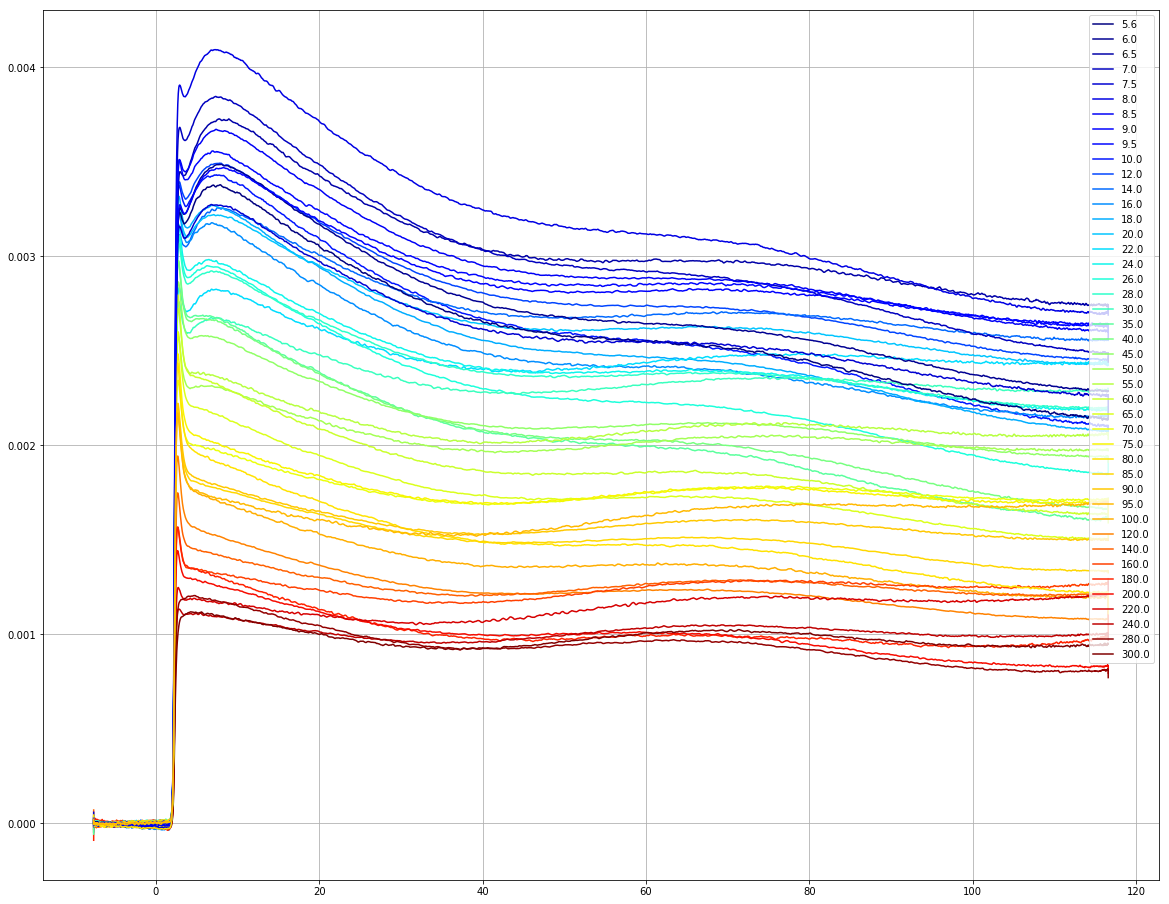

In [53]:
tr = transient.Transient()

filepath = 'E:/data/RuCl3/High Fluence_temperature/'
files = os.listdir(filepath)
ax = []
trs = []
k_parameters = []
cutFreq = 0.05 # THz
t0 = 115
key_parameter = 'temperature'
description = ''
for i in range(len(files)):
    tr = transient.Transient()
    tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
    tr.crop_time_scale()
    tr.shift_time(t0)
    tr.filter_low_pass(cutFreq)
    tr.flip_trace()
    tr.remove_DC_offset()
    tr.flip_time()
    k_parameters.append(float(tr.key_parameter_value))
    trs.append(tr)
print(len(trs))


fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNormLog = colors.LogNorm(vmin=min(k_parameters), vmax=max(k_parameters))
cNorm  = colors.Normalize(vmin=min(k_parameters), vmax=max(k_parameters))
scalarMap = cmx.ScalarMappable(norm=cNormLog, cmap=jet)
lines = []
for idx in range(len(trs)):
    colorVal = scalarMap.to_rgba(trs[idx].key_parameter_value)
    retLine, = ax.plot(trs[idx].time, trs[idx].trace, color=colorVal)
    #retLine.set_color()
    lines.append(retLine)
labels = []

for i in range(len(lines)):
    labels.append((lines[i],k_parameters[i]))
labels = sorted(labels, key=lambda kpar: float(kpar[1]))
lbLines=[]
lbVals=[]
for i in range(len(labels)):
    lbLines.append(labels[i][0])
    lbVals.append(labels[i][1])


# labels[0,:] = lines
# labels[1,:] = k_parameters
print(labels)
ax.legend(lbLines, lbVals, loc='upper right')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(ax, cax=cax)
# cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])
# plt.colorbar(mappable, ax=ax, **kwargs)
ax.grid()


In [49]:
labels[1][1]

6.0

In [13]:
tr.raw_time

array([  -0.81865948,   -0.82156379,   -0.82445452, ...,  128.97869492,
        128.97332208,  128.96793582])

In [26]:
tr.filter_low_pass(cutHigh=0.05)

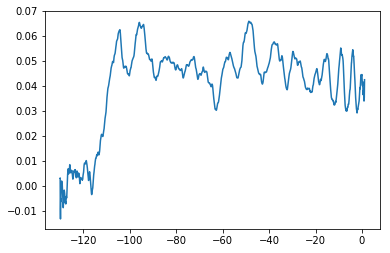

In [32]:
figure = plt.figure('testplot')
ax1 = plt.plot(tr.time,tr.trace)
plt.show()